# Data & Apprentissage, M2CHPS 2024

## 5th Lab Session

**Instructor:** [Argyris Kalogeratos](http://kalogeratos.com) (contact: argyris.kalogeratos@ens-paris-saclay.fr).  
**Sylabus:** [http://nvayatis.perso.math.cnrs.fr/CHPScourse-2024.html](http://nvayatis.perso.math.cnrs.fr/CHPScourse-2024.html)

The most updated version of this file can be found at instructor's webpage:  
[http://kalogeratos.com/MyCourses/DML-M2HPC/Lab#.ipynb](http://kalogeratos.com/psite/files/MyCourses/DML-M2HPC/Lab#.ipynb),
where '#' should be replaced by the number of the lab session. These notebooks are self-contained and hence have all the needed links to other resources.

## Bayes' Theorem

Fundamental in probability and Bayesian statistics, and as a result in machine learning. This is a sidenote so that you go easier to the Gaussian Mixture Modeling that comes next.

For discrete random variables (events), $A$ and $B$, Bayes' theorem states:

$$ P(A|B) = \frac{P(A) P(B|A)}{P(B)}
$$

where 

- $p(A)$, $p(B)$: prior or marginal probability for $A$ to occur, and respectively for $B$ for which $p(B) \neq 0$
- $p(A \cap B)$: probability for both $A$ and $B$ to occur (note: it doesn't mean to occur simultaneusly; obviously $p(A \cap B) = p(B \cap A)$). Most usual notation: $p(A,B) := p(A \cap B)$
- $p(A | B)$: conditional (or posterior) probability for $A$ to occur, given $B$ (resp. for $p(B | A)$). This can be also perceived as the "likelihood of $A$ given $B$".

Bayes' theorem can be derived by the definition of conditional probability $P(A|B)$. 

Conditional probability (for $p(B) \neq 0$):

$$ p(A|B) = \frac{p(A \cap B)}{p(B)}
$$

Similarly
$$ p(B|A) = \frac{p(A \cap B)}{p(A)}
$$

$$\Rightarrow p(A \cap B) = p(A) p(B|A) $$

Taking this and substituting into the conditional $p(A|B)$ yields Bayes' theorem

$$ p(A|B) = \frac{p(A) p(B|A)}{p(B)}
$$

## Graphical models

(reading: [Pattern Recognition and Machine Learning, Bishop. Chapter 8](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf))

**Product rule**

Consider an arbitrary joint distribution of 3 variables $x$,$y$,$z$ (continuous or discrete). The product rule gives

$$p(x,y,z) = p(z|x,y) p(x,y) = p(z|x,y) p(y|x) p(x)$$

In general, for $x_1,...,x_k$ variables:

$$p(x_1,...,x_k) = p(x_k|x_1,...,x_{k-1}) p(x_{k-1}|x_1,...,x_{k-2}) ... p(x_2|x_1) p(x_1)$$

**Marginalization**

If none of the $x$, $y$, $z$ are observed, we can marginalize with respect to (e.g.) one variable, here $x$, by summing over all of its possible outcomes

$$p(x,y,z) = p(z|x,y) p(y|x) p(x) \ \ \Rightarrow\ \ 
p(y,z) = \sum_x p(z|x,y) p(y|x) p(x)$$



**Example graphical model 1**

<img src="./graphical-model-1.png" alt="graphical model" width="200px"/>

A probabilisic graphical model is a graph describing the exact dependencies of the random variables of a problem with directed edges. For instance, in this case 

- $a$ is independent of $b$ and $c$
- $b$ depends on $a$: 
- $c$ depends on both $a$ and $b$

In this example, the joint probability is

$$ p(a,b,c) = p(c|a,b)p(a,b) = p(c|a,b)p(b|a)p(a)
$$

The directed edge going from $b$ to $c$ makes $b$ a **parent** to $c$. Any path of directed edges express a dependency between the start and the end node. However, to define the conditional probability of a variable it is suficient to know the outcome of its parent(s).

**Example graphical model 2**

<img src="./graphical-model-2.png" alt="graphical model" width="200px"/>

$$ p(x_1,..., x_7) = p(x_1)p(x_2)p(x_3) p(x_4|x_1,x_2,x_3) p(x_5|x_1,x_3) p(x_6|x_4) p(x_7|x_4,x_5)
$$


**Conditional independence**

Case 1: 
<img src="./graphical-model-3.png" alt="graphical model" width="200px"/>

Let's suppose now that $c$ is observed and we know its value, and let's study the conditional dependence/independence between $a$ and $b$ for the graph above

$$ p(a,b|c) = \frac{p(a,b,c)}{p(c)} = \frac{p(a|c)p(b|c)p(c)}{p(c)} = p(a|c) p(b|c) 
$$

Therefore, $a$ and $b$ are independent knowing $c$, i.e. knowing $c$ gives all the external information needed to then draw each of those variables.

Case 2: 
<img src="./graphical-model-4.png" alt="graphical model" width="250px"/>

$$ p(a,b|c) = \frac{p(a,b,c)}{p(c)} = \frac{p(a)p(c|a)p(b|c)}{p(c)} = p(a|c) p(b|c)
$$

Here, again, we see that $a$ and $b$ are independent knowing $c$.

Case 3: 
<img src="./graphical-model-5.png" alt="graphical model" width="220px"/>

$$ p(a,b|c) = \frac{p(a,b,c)}{p(c)} = \frac{p(a,b)p(c|a,b)}{p(c)}= \frac{p(a)p(b)p(c|a,b)}{p(c)}
$$

Which means that, contrary to the previous examples, $a$ and $b$ are **not** independent knowing $c$.


**Example**

A security system relies on a battery, a sensor, and an alarm. Consider the three respective binary random variables $a$, $b$, $c$. 

- $b$: The battery can be either functioning (1) or disfunctioning (0)
- $c$: The sensor can be either functioning properly (1) or disfunctioning (0)
- $a$: The alarm can be either firing (1) or silent (0)

The simple graphical model is
<img src="./graphical-model-6.png" alt="graphical model" width="220px"/>

Let's suppose the priors are given by the manufacturer (i.e. they mean some faulty condition of the material)

- $p(b=1) = 0.9$ 
- $p(c=1) = 0.9$ 


Also, knowing the state of the battery and the sensor, we can know the probability for the alarm to fire

| | **c=0** | **c=1** |
|--------:|:-----------|:----------|
| **b=0** | 0.1 | 0.2 |
| **b=1** | 0.2 | 0.8 |

**a)** Suppose **the sensor is ok**, but **the battery is not ok**. What is the probability for the alarm to remain silent?

Under these conditions, the alarm fires with probability: 

$$p(a=1|b=0, c=1) = 0.2$$

And remains silent with probability 

$$1 - p(a=1|b=0, c=1) = 0.8$$

**b)** Suppose **we don't hear any alarm** (with good ears!) and **we have no information about the sensor** functioning. What is the probability for the battery to be disfunctioning?

We can start by the Bayes' theorem 

$$ p(b=0|a=0) = \frac{p(b=0) p(a=0|b=0)}{p(a=0)} $$

Out of that, we only know that $p(b=0) = 1-p(b=1) = 1-0.9 = 0.1$.

We need to compute the rest of the terms. Let's focus on the prior in the denominator, which gives the probability for the alarm to remain silent, *regardless* the other random variables. And when we say "regardless" it means that we need to take into account all of their possible outcomes in the case they affect the variable of interest (here the alarm $a$)

$$p(a=0) = \sum_{b\in\{0,1\}} \sum_{c\in\{0,1\}} p(a=0 | b,c) p(b) p(c) = 0.315$$

Then we compute the term with the conditional probability (regardless $c$ which we know affects the alarm)

$$p(a=0|b=0) = \sum_{c\in\{0,1\}} p(a=0 | b=0, c) p(c) = 0.81$$

Now, we are ready to say that 

$$ p(b=0|a=0) = \frac{p(b=0) p(a=0|b=0)}{p(a=0)} \simeq 0.257$$

**c)** Suppose, in addition to the fact that **the alarm is silent**, we check that **the sensor does not work properly**. What is the posterior of having a disfunctioning battery?

$$ p(b=0|a=0,c=0) = \frac{p(b=0)p(a=0|b=0,c=0)}{p(a=0,c=0)} = \frac{p(b=0)p(a=0|b=0,c=0)}{\sum_{b\in\{0,1\}}p(a=0|c=0,b)p(b)} \simeq 0.111
$$



## $K$-means clustering


<img src="./k-means.png" alt="k-means" width="800px"/>

$K$: given number of clusters 

$x_n$: datapoint vectors of dimension $d$

$r_n$: datapoint-to-cluster assignment vector (responsibility); this representation is called 1-of-$K$ coding 

$\mu_k$: the mean (center) of cluster $k$

$N_k$: the number of datapoints assigned to cluster $k$

$N$: the total number of datapoints

Let's also assume that $r$ is the whole $N \times K$ assignement matrix, and $\mu$ is the whole $K \times d$ matrix with the cluster centers.

The objective of $K$-means is to find find clusters that contain points that are as close as possible inside each cluster (intra-cluster variance) and as far as possible to other clusters (inter-cluster variance). This translates to finding centers that are as close as possible to the data and far from the other centers. 

The objective it uses for quantifying the quality of a solution is a distortion quantity (cost function), such as is the **Mean Squared Error**:

$$MSE(\mu,r) = \frac{1}{N} \sum_{n=1}^N \sum_{k=1}^{K} r_{nk} \Vert x_n - \mu_k\Vert^2_2$$

$\Vert x_n - \mu_k\Vert^2$ is the squared Euclidean distance between the datapoint and a center:

$$\Vert x_n - \mu_k\Vert^2 = \left( \sqrt{\sum_{i=1}^d (x_{ni} - \mu_{ki})^2}\right)^2 = \sum_{i=1}^d (x_{ni} - \mu_{ki})^2 $$

Note also that 

$$\Vert x_n - \mu_k\Vert^2 = (x_n - \mu_k)^\top(x_n - \mu_k)$$


Since the factor $\frac{1}{N}$ is a constant that plays no role in the optimization, we can remove it and keep the rest in an objective function to minimize:

$$J(\mu,r) = \sum_{n=1}^N \sum_{k=1}^{K} r_{nk} \Vert x_n - \mu_k\Vert^2_2 $$

$$ \Rightarrow (\mu^*,r^*) = \arg\!\min_{\mu,r}\sum_{n=1}^N \sum_{k=1}^{K} r_{nk} \Vert x_n - \mu_k\Vert^2_2 $$

Optimizing $J$ w.r.t. $r$ is easy. First, since the the contribution of each point to the error is summed up, we can minimize them independently. Therefore, this means that for each datapoint $x_{n}$ we look for the $k$ for which the distance to the associated center $\Vert x_n - \mu_k\Vert^2_2$ is minimal:

$$
r_{nk} = \left\{
\begin{array}{ll}
1, \ \ \text{if } k = \arg\!\min_j \Vert x_n - \mu_j \Vert^2_2\\
0, \ \ \text{otherwise}
\end{array}\right.
$$

The parameters we want to learn is the matrices $\mu$ and $r$. Therefore we need to optimize $J(\mu,r)$ w.r.t. those parameters. Let's start by minimizing the cost w.r.t. $\mu$ by keeping fixed $r$. Since $J$ is a quadratic function w.r.t. $\mu$, we proceed with computing the derivatives of the objective function and setting them to zero. By inverting the sums of $J$: 

$$J(\mu,r) = \sum_{n=1}^N \sum_{k=1}^{K} r_{nk} \Vert x_n - \mu_k\Vert^2_2  =\sum_{k=1}^{K} \sum_{n=1}^N r_{nk} \Vert x_n - \mu_k\Vert^2_2 $$

we see that we can optimize independently the $K$, so we can focus on the cluster-wise errors:


$$ \nabla_{\mu_k}J_k = \nabla_{\mu_k} \left(\sum_{n=1}^N r_{nk} \Vert x_n - \mu_k\Vert^2 \right) $$

$$ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \   =  \sum_{n=1}^N r_{nk} \nabla_{\mu_k} \left((x_n - \mu_k)^\top(x_n - \mu_k)\right) $$

$$ \ =  \sum_{n=1}^N r_{nk} (-2 (x_n - \mu_k))  $$

$$ \ \ \ \ \ \   = -2\sum_{n=1}^N  r_{nk} (x_n - \mu_k) = 0$$

$$ \ \ \ \  \Rightarrow \sum_{n=1}^N  r_{nk} (x_n - \mu_k) = 0$$

In the third line, we have used that $\nabla a^\top a = 2a$.

By solving over $\mu_k$ we get as optimal cluster representation the barycenter of the datapoints in cluster $k$:

$$ \sum_{n=1}^N  r_{nk} x_n = \mu_k \sum_{n=1}^N  r_{nk} $$


$$ \Rightarrow \mu_k = \frac{\sum_{n=1}^N  r_{nk} x_n}{\sum_{n=1}^N  r_{nk}}$$

$K$-means first initializes the clusters (or the centers, it's equivalent), and then follows an iterative optimization scheme by repeating thw following two steps until convergence: 
- Assign each datapoint to the cluster with the closest center by computing $r_{nk}$'s
- Recompute the centers $\mu_k$'s

**Visualize K-means:**
http://alekseynp.com/viz/k-means.html

**Online $K$-means**

The above is the batch $K$-means that in each iteration it takes into account all processes all data and updates also all centers. However, an online version can be formulated, which considers at each iteration that it should update the solution only w.r.t. to one arriving datapoint. A way to formalize an iteration is to assign the new datapoint $x_n$ to the cluster $k$ with the closest center, and then update only that center by

$$ \mu_k^{\text{new}} = \mu_k^{\text{prev}} + \eta (x_n - \mu_k^{prev})
$$

where $\eta$ is a **learning rate** that is monotonically decreasing as more datapoints are considered. The advantage of this approach is that it processes each datapoint only once, so it does not need to store the data in memory, but only the cluster centers. Note that at the beginning, the first $K$ datapoints become automatically cluster centers so the rest of the process can continue as described.

This procedure can be used even for cases where we have stored the data. Again, at each iteration only one datapoint is considered as "arriving" (e.g. picked uniformly at random from the dataset), but during the multiple iterations a datapoint is supposed to be examined again and again. In that case, the learning rate can be just $\frac{1}{\text{size of cluster } k} $.

## $K$-medoids (PAM: Partitioning Around Medoids)

The arithmetic mean $\mu_k$ can be a point very close to actual datapoints of the cluster, or can be far from them depending on the data distribution inside the cluster (e.g. unimodal vs multimodal, and when the data are super sparse). In the second case, $K$-means can face problems becasue it's not robust enough. 

One simple approach to tackle this problem and increase the robustness of the optimization problem is to restrict the cluster representative so as to be one of the datapoints belonging to the cluster. 

$$J(\mu,r) = \sum_{n=1}^N \sum_{k=1}^{K} r_{nk} \Vert x_n - m_k\Vert^2_2 $$

under the condition that each $m_k$, $k=1,...,K$ is a datapoint of the input dataset. Optimizing over $r$ is exaclty as before: each point gets assigned to the cluster with the closest to it representative. Given which datapoints belong to each cluster ($r_{\cdot,k}$), we focus, as before, on minimizing the error for each cluster $k$ separately:

$$ m_k^* = \arg\!\min_{m\in X}\sum_{n=1}^N r_{nk} \Vert x_n - m\Vert^2_2 $$

Which is exactly the definition of the **medoid** datapoint in a set: the datapoint that has the smallest distance to all other datapoints of the set.

## $K$-means++ 

<img src="./k-means++.png" alt="k-means" width="800px"/>

## Gaussian Mixture Modeling (GMM)

Contrary to $K$-means, this is a **model-based** approach, which means that it assumes that the data are generated by an uknown **probabilistic model**. In this case, the GMM model is a mixture of Gaussian distributions that are linearly superimposed

$$ p(x) = \sum_{k=1}^K \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)
$$

This says that the probability to observe $x$ is the sum of the probability to have been generated by each of the components of the mixture, where $\pi_k \in [0,1]$, $\sum_{k=1}^K\pi_k=1$, is a prior giving the contribution of each component to the mixture. What can be noted is that, contrary to **hard-clustering** like $K$-means where each datapoint belongs strictly to one cluster, here we aim at finding a **soft-clustering** (or fuzzy) where a datapoint may belong to each cluster $k$ with a probability $\pi_k$. Recall also the form of the $d$-dimensional Gaussian distribution:

$$  \mathcal{N}(x|\mu,\Sigma) = \frac{1}{(2\pi)^{d/2}}\frac{1}{|\Sigma|^{1/2}} \exp\left\{ -\frac{1}{2}(x-\mu)^\top\Sigma^{-1}(x-\mu)\right\}
$$

where $\pi =3.14...$, not to be confused with later notation of the priors $\pi_k$.

As in any probabilistic model, to apply learning on data, we need first to define properly how the data are generated, and then learn the parameters of the model that (e.g.) minimize the surprise of the model when looking at the data, or equivalently, maximize the likelihood for those data to have been produced by the learned model. In a GMM, each data observation is produced as follows: 

- first, a component of the mixture is picked at random following $\pi_1,...,\pi_K$, let that be $k$

- then, an datapoint is generated following the $\mathcal{N}(\mu_k, \Sigma_k)$

Consider the random $\{0,1\}$-binary vector $z$ as a $K$-to-one representation of the data classes, if we draw one such vector it will have $1$ to only one dimension our of the $K$. If we draw random vectors $z$, then the probability to have $1$ at the dimension $z_k$  is $\pi_k$. 

$$p(z_k=1) = \pi_k$$

where $\pi_k \in [0,1]$, $\sum_{k=1}^K\pi_k=1$. Next we simplify notation by denoting $p(z_k) := p(z_k=1)$.

If $x$ is the random variable of the data, and $z$ is the random variable of the classes that generate the data then the joint distribution is

$$p(x,z) = p(z) p(x|z)$$

where $p(x,z)$ is the **joint distribution** in terms of the **marginal distribution** $p(z)$ and the **conditional distribution** $p(x|z)$. The graphical representation of the mixture model is simply: 

$$z \rightarrow x$$

which means that the random variable $x$ depends on the random variable $z$. In the unsupervised setting, the available datapoints is only observable information and not the class label of each of them. This is why $z$ is in fact a **latent variable**. However, in order to put in operation our probabilistic model and compute a likelihood, we need to be able for each datapoint to generate both $z_n$ and then $x_n$. The more detailed view of the graphical model, which includes also the parameters of the Gaussian components is 

<img src="./The-graphical-model-of-GMM.png" alt="the graphical model of GMM" width="200px"/>

Therefore, to compute the marginal probability $p(x)$ given the joint probability $p(x,z) = p(z) p(x|z)$, we need to sum over all the possible states of $z$

$$p(x) =  \sum_{z} p(z)p(x|z) = \sum_{k=1}^K \pi_k p(x|z_k) = \sum_{k=1}^K \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)$$

The desired GMM output is to be able to tell us in the end about the cluster to which a datapoint belongs. As we said at the earlier, this is more complicated than in the case of hard-clustering. In any case, we need to be able to compute the posterior probability $p(z|x)$ which tells us what is the probability of the class $z$ given the observed datapoint $x$.

$$ \gamma(z_{k}) := p(z_k | x) = \frac{\pi_k p(x|z_k)}{\sum_{j=1}^{K} \pi_j p(x|z_j)} $$

$$ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \  \  = \frac{\pi_k \mathcal{N}(x | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(x | \mu_j, \Sigma_j)} $$

$\gamma(z_{nk})$ is the share of responsibility of component $k$ to interpret the datapoint $n$.

**Fitting the GMM**

To learn the GMM parameters we will use a maximum (log-)likelihood approach via an iterative procedure called **Expectation-Maximization** (EM algorithm).

Let the set of parameters be $\Theta = \{\pi, \mu, \Sigma\}$ for all the components and $\Theta_k = \{\pi_k, \mu_k, \Sigma_k\}$ for the $k$-th component. Then, the **log-likelihood for a datapoint $x_n$** is 

$$\ln p(x_n|\Theta_k) =  \ln\left[\sum_{k=1}^K \pi_k p(x_n|z_k)\right]$$

and the total **log-likelihood for a datset $X = x_1,...,x_N$** is 

$$\ln p(X|\Theta) =  \sum_{n=1}^{N}\ln\left[\sum_{k=1}^K \pi_k p(x_n|z_k)\right]$$

Setting the derrivative w.r.t. $\mu_k$ to zero

$$\nabla_{\mu_k} \ln p(X|\Theta) =  - \sum_{n=1}^{N} \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(x_n | \mu_j, \Sigma_j)}  \Sigma_k (x_n - \mu_k)$$

$$ \ \ \ \ \ =  - \sum_{n=1}^{N} \gamma(z_{nk})\Sigma_k (x_n - \mu_k) = 0$$

Assuming that $\Sigma$ is nonsingular, thus invertible, we multiply by $\Sigma^{-1}$ and by rearranging we get as optimal mean for the $k$ Gaussian component the average of all datapoints weighted by the responsibility (conditional probability) of this component of the mixture for each of them

$$ \mu_k = \frac{1}{N_k}\sum_{n=1}^{N} \gamma(z_{nk}) x_n$$

where $N_k = \sum_{n=1}^{N} \gamma(z_{nk})$ is the total responsibility of the $k$-th component.

With similar calculations to optimize over $\Sigma_k$ and $\pi_k$ (for this one we need to introduce a Langragian multiplier to respect the constraint that $\sum_k \pi_k = 1$, we arrive to optimal values at each iteration 

$$ \Sigma_k = \frac{1}{N_k} \sum_{n=1}^{N} \gamma(z_{nk}) (x_n - \mu) (x_n - \mu)^\top
$$

$$ \pi_k = \frac{N_k}{N}
$$

**The EM algorithm for GMM**

**1.** Initialize the means $\mu_k$ and the covariance matrices $\Sigma_k$, for $k=1,...,K$. Also evaluate the log-likelihood

$$\ln p(X|\Theta) =  \sum_{n=1}^{N}\ln\left[\sum_{k=1}^K \pi_k p(x_n|z_k)\right]$$

**2.** **E-step** (Estimation). Evaluate the responsibilities using the current parameter values

$$ \gamma(z_{nk}) := \frac{\pi_k \mathcal{N}(x_n | \mu_k, \Sigma_k)}{\sum_{j=1}^{K} \pi_j \mathcal{N}(x_n | \mu_j, \Sigma_j)} $$

**3.** **M-step** (Maximization). Re-estimate the parameters using using the current responsibilities

$$ \mu_k = \frac{1}{N_k}\sum_{n=1}^{N} \gamma(z_{nk}) x_n$$

$$ \Sigma_k = \frac{1}{N_k} \sum_{n=1}^{N} \gamma(z_{nk}) (x_n - \mu_) (x_n - \mu_k)^\top
$$

$$ \pi_k = \frac{N_k}{N}
$$

where $N_k = \sum_{n=1}^{N} \gamma(z_{nk})$

**4.** Evaluate the log-likelihood and check for convergence of either the parameters of the log-likelihood. If not converged... **return to Step 2**


## Relation between EM and K-means
(reading: [Pattern Recognition and Machine Learning, C. Bishop. Section 9.3.2](https://www.microsoft.com/en-us/research/uploads/prod/2006/01/Bishop-Pattern-Recognition-and-Machine-Learning-2006.pdf))

If we consider that all components share the same $\Sigma_k = \epsilon I$, $\forall k$, where $\epsilon > 0$ is a fixed constant representing the variance (i.e. does not need to be estimated), and $I$ is the $d \times d$ identity matrix, then the posterior probability of observing $x_n$ from the component $k$ becomes

$$  \!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!\!p(x_n|z_k) = p(x|\mu_k,\Sigma_k) = 
$$

$$  = \mathcal{N}(x|\mu_k,\Sigma_k) = \frac{1}{(2\pi)^{d/2}}\frac{1}{|\Sigma_k|^{1/2}} \exp\left\{ -\frac{1}{2}(x_n-\mu_k)^\top\Sigma_k^{-1}(x_n-\mu_k)\right\}
$$

$$  \ \  \quad \quad \quad \quad \quad\quad= \frac{1}{(2\pi)^{d/2}}\frac{1}{|\epsilon I|^{1/2}} \exp\left\{ -\frac{1}{2}(x_n-\mu_k)^\top(\epsilon I)^{-1}(x_n-\mu_k)\right\}
$$

$$  \ \ = \frac{1}{(2\pi)^{d/2}\epsilon^{1/2} I} \exp\left\{ -\frac{1}{2\epsilon}\Vert x_n-\mu_k\Vert ^2_2\right\}
$$

Note that, for a vector $a$: $\ \ a^\top (\epsilon I)^{-1} a = \frac{1}{\epsilon} a^\top I a = \frac{1}{\epsilon} a^\top a$.

Then 

$$ \gamma(z_{nk}) := p(z_k | x_n) = \frac{\pi_k p(x_n|z_k)}{\sum_{j=1}^{K} \pi_j p(x_n|z_j)} $$

$$                 \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ = \frac{\pi_k \exp\left\{-\frac{1}{2\epsilon}\Vert x_n-\mu_k\Vert ^2_2\right\}}{\sum_{j=1}^{K} \pi_j\exp\left\{-\frac{1}{2\epsilon}\Vert x_n-\mu_j\Vert ^2_2\right\}} $$

We can now study the behavior of the denominator for a given datapoint $x_n$, when $\epsilon \rightarrow 0$. In that case, all elements of the sum will go faster to $0$ compared to the element that corresponds to the component with the smallest $\Vert x_n-\mu_j\Vert ^2_2$. For that component, let that be the $j=k$-th one, $\gamma(z_{nk}) \rightarrow 1$, while for the rest $\gamma(z_{nj}) \rightarrow 0$, $\forall j \neq k$. Which means that in the limit this approach will give a **hard assignement** for each datapoint to one component (cluster), which is exactly what $K$-means is doing.

Therefore, $\gamma(z_{nk}) \rightarrow r_{nk}$, hence and the EM estimation step for $\mu_k$ would give the mean value of the datapoints belonging to each cluster

$$ \mu_k = \frac{1}{N_k}\sum_{n=1}^{N} \gamma(z_{nk}) x_n = \frac{\sum_{n=1}^{N} r_{nk} x_n}{\sum_{n=1}^{N} r_{nk}}$$

Remember that there is no EM estimation step for $\Sigma_k$ in this case!

Then, as $\epsilon\rightarrow 0$, the log-likelihood for all the data $X$ and the assignments $Z$ would be 

$$\mathbb{E}\left[\ln p(X,Z|\Theta)\right] \xrightarrow{\epsilon\rightarrow 0} \frac{1}{2} \sum_{n=1}^{N} \sum_{k=1}^{K} r_{nk} \Vert x_n-\mu_k\Vert^2_2 + const$$

which means that in the limit EM would minimize the distortion $J$ that $K$-means considers.


**K-means vs GMM example**

Some of the code comes from: https://jakevdp.github.io/PythonDataScienceHandbook/05.12-gaussian-mixtures.html

Ground truth labels


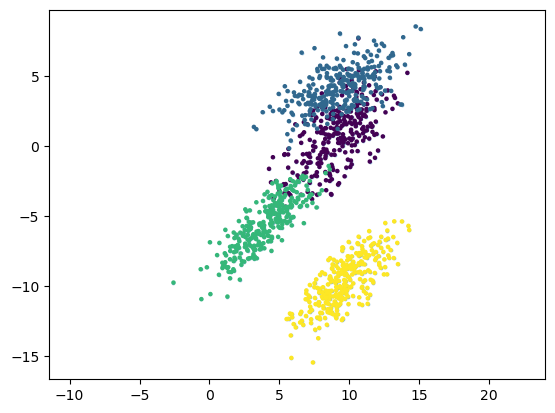

In [470]:
import numpy as np
from numpy import random
from scipy.stats import multivariate_normal
import matplotlib.pyplot as plt
# import GMM
from sklearn.mixture import GaussianMixture as GMM
from matplotlib.patches import Ellipse

from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def gen_data(k=3, dim=2, points_per_cluster=200, lim=[-10, 10]):
    '''
    Generates data from a random mixture of Gaussians in a given range.
    Will also plot the points in case of 2D.
    input:
        - k: Number of Gaussian clusters
        - dim: Dimension of generated points
        - points_per_cluster: Number of points to be generated for each cluster
        - lim: Range of mean values
    output:
        - X: Generated points (points_per_cluster*k, dim)
    '''
    x = []
    mean = random.rand(k, dim)*(lim[1]-lim[0]) + lim[0]
    for i in range(k):
        cov = random.rand(dim, dim+10)
        cov = np.matmul(cov, cov.T)
        _x = np.random.multivariate_normal(mean[i], cov, points_per_cluster)
        x += list(_x)
    x = np.array(x)
    if(dim == 2):
        fig = plt.figure()
        ax = fig.gca()
        ax.scatter(x[:,0], x[:,1], s=3, alpha=0.4)
        ax.autoscale(enable=True) 
    return x

def plot(title):
    '''
    Draw the data points and the fitted mixture model.
    input:
        - title: title of plot and name with which it will be saved.
    '''
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca()
    ax.scatter(X[:, 0], X[:, 1], s=3, alpha=0.4)
    ax.scatter(gmm.mu[:, 0], gmm.mu[:, 1], c=gmm.colors)
    gmm.draw(ax, lw=3)
    ax.set_xlim((-12, 12))
    ax.set_ylim((-12, 12))
    
    plt.title(title)
    plt.savefig(title.replace(':', '_'))
    plt.show()
    plt.clf()

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)
    
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, ec='black', fc='lightgray',
                                lw=2, alpha=0.5, zorder=1))    

def plot_ground_truth_mixture(X, n_clusters=4, points_per_cluster=100, ax=None):
    labels = np.zeros([1,points_per_cluster],dtype=int)
    for i in range(n_clusters-1):
        labels = np.append(labels, (i+1)*np.ones([1,points_per_cluster],dtype=int), 1)    
    labels = labels[0]
    
    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis', zorder=2)

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)        
       
        
random.seed(4)
K = 4;
    
# Generate random 2D data with 3 clusters 
X = gen_data(k=K, dim=2, points_per_cluster=300)

# Show the ground truth of the mixture
print('Ground truth labels')
plot_ground_truth_mixture(X, n_clusters=K, points_per_cluster=300)

K-means clustering


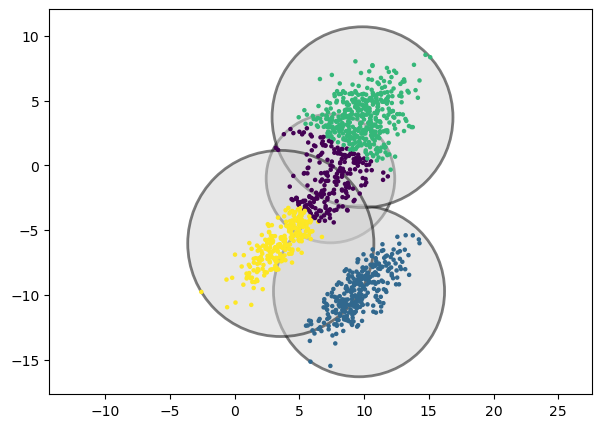

In [463]:
fig = plt.figure(figsize=(7, 5))
# Check k-means result first, showing also the diameter of each cluster
print('K-means hard clustering')
kmeans = KMeans(n_clusters=K, random_state=0)
plot_kmeans(kmeans, X)

GMM probabilistic clustering


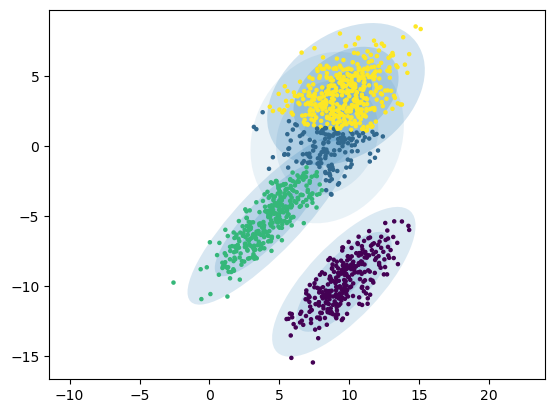

In [471]:
print('GMM probabilistic clustering')
gmm = GMM(n_components=K, random_state=42)
plot_gmm(gmm, X)

## Graph-based clustering methods

Now we pass to another type of clustering methods that have a graph-based viewpoint over the data. This means that they perceive either they can operate 

- directly on a graph represented by an adjacency matrix, 

- or they can first build a graph from the distances between the datapoints of a pointcloud and continue as in the first case.

The adjacency matrix $A$ is a square matrix where $A_{ij} = 1$ when the nodes $i$,$j$ have an edge, and otherwise $0$. Assuming that the matrix is symmetric (which implies that the distance measures we consider are symmetric: distance$(a,b) =\,$distance$(b,a)$), the degree of a node is the number of edges connecting the node to other nodes, and it is denoted by $d_i$.


We start with a method that operates directly on a graph.

**Newman's Modularity clustering** (reading: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1482622/)

Consider a graph $G$, with $N_v$ nodes (data objects equivalent to datapoints) and $N_e$ edges. Then consider that the graph has a partition into groups $s\in S$, the **modularity** measure is defined as:

$$ Q(G, S) \propto \sum_{s\in S} \left[ (\# \text{ of edges within group } s) - \mathbb{E}[\# \text{ of such edges}]  \right]
$$

After normalization such that $Q(G,S) \in [-1,1]$

$$ Q(G, S) = \frac{1}{2N_e} \sum_{s\in S} \sum_{i,j \in s} \left[ A_{ij} - \frac{d_i d_j}{2N_e}\right]
$$

The **null model** in this case is one with random edges that preserves the degree distribution.

One can any clustering method that produces an hierarchy of clusters (e.g. hierarchical aglomerative or bisecting clustering), monitor the quality by the modularity measure, and pick the solution with maximal modularity. However, in that case the clustering algorithm is not directly optimizing w.r.t. modularity.

Newman's clustering method optimizes directly the modularity measure. Let's define a matrix $B$ with entries

$$ B_{ij} = A_{ij} - \frac{d_i d_j}{2N_e}
$$

Represent a 2-partition (meaning a partition of the graph in two clusters) by a $\{-1,1\}$-binary vector $s = [s_1,...,s_{N_v}]^\top$. Then we can write the modularity in a quadratic form

$$
Q(G, S) = \frac{1}{4N_e} \sum_{i,j \in V} B_{ij}s_i s_j = \frac{1}{4N_e}s^\top B s
$$

Therefore, the modularity-based optimization problem (maximixation) for a 2-split is

$$ s^* = \arg\!\,\max_{s\in\{\pm1\}^{N_v}} s^\top B s
$$

Due to the "nasty" binary constrains over $s$, this optimization is NP-hard!

We can relax the constraints by letting $s \in \mathbb{R}^{N_v}$ and $\Vert s\Vert_2 = 1$

$$ s^* = \arg\!\,\max_{s\in\{\pm1\}^{N_v}} s^\top B s, \quad \text{subject to } s^\top s = 1
$$

Now we have a constrained optimization that we can work with. We use the Langrange method that uses a multiplier $\lambda$ to the constraint that we have and computes the derivative as follows

$$ \nabla_s \left[ s^\top B s + \lambda (1 - s^\top s)\right] = 0 $$

$$ 2 B s + 2 \lambda s  = 0 $$

$$ B s = \lambda s $$

This give the very elegant conclusion that $s$ is the eigenvector of $B$ with eigenvalue $\lambda$. At the optimum we have $$ B s = \lambda s $$ and therefore the modularity objective becomes

$$ s^\top (B s) = s^\top (\lambda s) = \lambda s^\top s 
$$

Which means... **to maximize modularity we need to pick the dominant eigenvector of the matrix $B$** (the eigenvector associated with the largest eigenvalue).

<img src="./newman-modularity.png" alt="modularity clustering" width="800px"/>

**Spectral clustering**
(reading: https://sites.stat.washington.edu/wxs/Stat593-s03/Literature/ng-jordan-weiss-nips01.pdf)

Spectral clustering starts with an adjacency matrix $A$ (could be $0,1$ or positive real valued  weights), the degree matrix $D$ (the node degrees in the diagonal, $D_{ii} = d_i$, all other elements are $0$) and builds the **graph Laplacian** matrix:

$$L = D - A$$

and then the **normalized graph Laplacian**

$$\bar{L} = D^{-1/2} L D^{-1/2}$$

Here, because of the sign in front of $A$, the most important eigenvectors of $\bar{L}$ are those corresponding to the smallest eigenvalues (and not the highest as when looking $A$). The spectral clustering algorithm is as follows.

- Input: Adjacency matrix $A$ and number of classes $K$

- Compute the normalized graph Laplacian $\bar{L} = D^{-1/2} L D^{-1/2}$

- Compute the eigenvectors of $\bar{L}$ associated with the $K$ smallest eigenvalues

- Let $U$ a $N\times K$ matrix that has as columns those eigenvectors
- Let $\hat{U}$ the row-wise normalized version of U: $\hat{u}_{ij} = \frac{u_{ij}}{\Vert U_i\Vert_2}$

- Apply $k$-means to $\left( \hat{U}_i\right)_{i=1,...,K}$

- Output: the partition into $K$ clusters


<img src="./spectral2.png" alt="spectral clustering" width="800px"/>

**What about when we have a point-cloud as input and not directly a graph?**
In that case, a kernel function is usually used to measure pairwise similarity from the input distances: e.g. RBF-kernel (radial basis function) 

$$kernel(x_i, x_j) = \exp\{-\gamma \Vert x_i - x_j \Vert^2_2\}$$

where $\gamma = \frac{1}{2\sigma^2}$.

First note that this way we pass from distances to a similarities. Note also that an adjacency matrix computed from $kernel(\cdot,\cdot)$ is going to be a full matrix. This causes numerical problems in the Singular Value Decomposition (SVD) that will next compute the eigenvectors of the graph Laplacian. To overcome this problem, the usual recipe is to use only the similarities corresponding to the $q$-Nearest Neighbors of each datapoint and then symmetrize the matrix again. This way the adjacency matrix $A$ will have $\mathcal{O}(\frac{1}{2}q N)$ non-zero elements (graph edges).

## Principal Component Analysis (PCA) for dimensionality reduction

Suppose data vectors $x_1,..., x_N \in \mathbb{R}^d$ in $d$-dimensions. The goal of dinensionality reduction is to produce a version of the data in a space with smaller dimensions, $k<d$. Typically, the smaller spece is defined through an orthonormal basis with $k$ axes. 

Dimensionality reduction compresses the data, and may serve a number of purposes:

- Data visualization and inspection

- For reducing the storage and processing cost

- For helping the learning algorithms perform better

**Preprocessing: data centering and standardization**

Before going further, we should note the **PCA needs the data to be centered around the origin**. Consider that $\bar{x}_{\text{raw}}$ is the mean of the original raw data, which, if substracted from the raw data, centers the data

$$\bar{x}_{\text{raw}} = \frac{1}{N}\sum_{n=1}^{N} x_{n,\text{raw}} $$

$$x_{n,\text{centered}} = x_{n,\text{raw}} - \bar{x}_{\text{raw}}$$

In what follows $x_n := x_{n,\text{centered}}$

As we will see later, PCA in the end uses eigenvectors of a covariance matrix. If the data are not centered, the eigenvectors are affected by a possible large mean data value, as shown in the figure below.

<img src="./PCA-centered2.jpg" alt="data centering " width="800px"/>

All the above is when working with a **covariance matrix** for data centered at the origin. However, PCA can be also applied on the **correlation matrix**. The covariance matrix is suitable when the scales of the variables are rather comparable, while the correlation matrix is better when the variables have big scale difference. In the latter case, we also standardize the data by dividing each feature value by the standard deviation of that feature. Apparenty, reconstracting the projected data back to the raw form, in such case would require to take the reconstructed $\tilde{x}_n$, multiply back each variable by the standard deviation of that variable in the raw data, and add back the raw mean value.

**Formulation**

There are two main ways to formalate mathematically this problem, which both end up to the same solution and algorithm. 

**a)** Historically the first way was to say that the **axes are such that minimize the reconstruction error**.

Let us suppose that a function $t : \mathbb{R}^d \rightarrow \mathbb{R}^k$ maps each datapoint to the new space, and a second function $s : \mathbb{R}^k \rightarrow \mathbb{R}^d$ maps back (i.e. reconstructs) datapoints from the smaller to the largest space. 

$$t(x) \xrightarrow{\ \ \ \ \text{maps}\ \ \ \ } x' \in \mathbb{R}^k$$

$$s(t(x)) \xrightarrow{\text{maps back}} \tilde{x} \in \mathbb{R}^d$$

The objective function that PCA uses to compute the projection of the data is the minimization of the reconstruction error

$$  \sum_{n=1}^{N} \Vert s(t(x_n)) - x_n \Vert^2_2
$$

The smaller $k$ is, the larger the compression of the data, and therefore the expected reconstruction error.

We won't into details for this one.


**b)** The first is to say that each of **the orthonormal axes are along a direction of maximum variance**. E.g. the first to be along the largest, the second shoud be orthogonal to the first and along the second direction of highest variance, etc. One thing to note is the distinction between the error that PCA minimizes compared to the Ordinary Least Squares (OLS) error for regression, which visually may be misunderstood as methods that try to compute something similar. In fact, in regression OLS sees the line as a function, hence the error is between the points $x$ and the response $f(x)$, which in a 2D graph corresponds to a vertical line from $x$ to $f(x)$. Here, PCA (and generally dimensionality reduction, looks at the projection of $x$ on some axes, therefore the minimized error is represented as a perpendicular line from $x$ to a given projection axis.

<img src="./line-projection.jpg" alt="line projection" width="300px"/>

<img src="./pca-2axes.png" alt="line projection" width="600px"/>



<img src="./pc-projection.gif" alt="projection on principal component" width="700px"/>

Let's suppose that the directions along the axes of the space we look for are $u_1,...,u_k$, and that $u_i$'s are unit vectors, $u_i^\top u_i = 1$, as we are interested only in their directions and not their magnitude (see later, in the optimization part, why we put this constraint). Let also $U \in \mathbb{R}^{d\times k}$ be a matrix that has the eigenvectors as rows.

Let's concentrate on the first axis of maximum variance. 

- **Mean** of the data:

$$\bar{x} =  \frac{1}{N}\sum_{n=1}^{N} x_n$$

- **Variance of the data**

$$ Var[x_n] = \frac{1}{N}\sum_{n=1}^{N} (x_n - \bar{x})^2$$

- **Projection** of the datapoint $x_n$ on $u_1$ axis 

$$x_n' = u_1^\top x_n$$

This gives a scalar as coordinate on this direction. For multiple axes, $k>1$, it would be a vector: 

$$x_n' = (u_1^\top x_n, ..., u_k^\top x_n)^\top$$  

computed by 

$$x'_n = U^\top x_n$$

where $U$ plays here the role of a projection matrix.

- **Reconstruct** the datapoint $x_n$ in the original space 

$$\tilde{x}_n = x_n' u_1^\top$$


For multiple axes, $k>1$, this is 

$$\tilde{x}_n = x_n' U^\top$$

where $U$ is a matrix that has the eigenvectors as rows, and plays the role of a projection matrix. Note that this reconstructs the point with respect to the centered data. If one is interested to get a reconstruction with respect to the original raw data, then the above result should be translated by $\bar{x}_{\text{raw}}$ (see the earlier note no preprocessing)

$$\tilde{x}_n = x_n' u_1^\top + \bar{x}_{\text{raw}}$$

- **Variance of the projected data**

$$ Var[x'] = \frac{1}{N}\sum_{n=1}^{N} (x'_n - \bar{x}')^2 
= \frac{1}{N}\sum_{n=1}^{N} (u_1^\top x_n - u_1^\top \bar{x})^2 \\
= \frac{1}{N}\sum_{n=1}^{N}(u_1^\top x_n - u_1^\top \bar{x})^\top (u_1^\top x_n - u_1^\top \bar{x}) \\
u_1^\top\left[\frac{1}{N}\sum_{n=1}^{N} (x_n - \bar{x})(x_n - \bar{x})^\top \right]u_1\\
= u_1^\top S u_1$$

where note that $S$ is the covariance of the projected data (i.e. covariance about the origin, as the data are centered).

What we want is to find a $u_1$ along which the variance is maximized. This is a constrained optimization of the quadratic function $u_1^\top S u_1$, were the constraint is that we want $\Vert u_1 \Vert_2$ to stay as small as possible close to $1$, because it's evident that the this function can be otherwise arbitrarily maximized by $\Vert u_1 \Vert_2 \rightarrow \infty$.

The objective function uses the Lagrangian multiplier $\lambda_1 \in \mathbb{R}$

$$ \phi(u_1) = u_1^\top S u_1 + \lambda_1 (1-u_1^\top u_1) 
$$

The longer $u_1$ becomes (i.e. norm > 1), the more the penalty term $\lambda_1 (1-u_1^\top u_1)$ "penalizes" such a solution by reducing the objective function. By setting the derivative to $0$, we get a stationary point at

$$ \nabla_{u_1}\phi(u_1) = S u_1 - \lambda_1 u_1 = 0\\
\!\!\Rightarrow S u_1 = \lambda_1 u_1
$$

Which means that $u_1$ should be an eigenvector of the covariance matrix $S$.

By left-multiplying with $u_1^\top$, and since by definition $u_1^\top u_1 = 1$, we get

$$ u_1^\top S u_1 = \lambda_1$$

The conclusion is that the variance $Var[x']$ is maximized if we pick as $u_1$ the eigenvector associated with the largest eigenvalue of the covariance matrix $S: \ $$\lambda_1 = \lambda_{\text{max}}(S)$.

The second axis $u_2$ can be introduced such that it maximizes $Var[x']$ of the projected data, and be any orthogonal direction to $u_1$, etc. For dimensionality reduction from $d$ to $k$ dimensions it can be shown by induction that we need the $k$ eigenvectors associated to the $k$ largest eigenvalues of the covariance matrix $S$.

Note that we can have at most $k=d$ eigenvectors of $S$. In that case, the projection will be loseless information-wise (no information is lost) but without any value regarding compression. Given that the eigenvectors are pairwise orthogonal, it is easy to see that the final projection axes will be different to the initial ones only up to a rotation.

Note also that the eigenvectors of a symmetric matrix is always pairwise orthogonal, but this does not hold for non-symmetric matrices. The covariance matrix $S$, however, is both symmetric, therefore the eigenvectors are orthogonal; it is also positive semi-definite, therefore invertible.

Finally, the need to have initially centered data is for ensuring that the eigenvectors correspond to the actual variance of the data, otherwise the eigenvector may be "affected" by how far the mean of the original data is from the $(0,...,0)$ origin.

**Visualizing the axes as eigen-items -- The eigenfaces example**

One interesting property of this kind of dimensionality reduction is that the vectors $u_1,...,u_k$ defining the axes of the projected space are vectors with $d$-dimensions. This means that in situations where the original data objects can be visualized, $u_1,...,u_k$ can also be visualized to demonstrate the properties of the projected space.

The eigenfaces is a nice example to demonstrate this.

Let's consider the Olivetti face dataset that contains $10$ poses of face photos of $40$ individuals. The images are scaled to the same size and centered at the facial characteristics of the persons. These are important preprocessing steps for the rest of the pipeline to work better.

dataset size:
(400, 4096)
Photo size:
(64, 64)


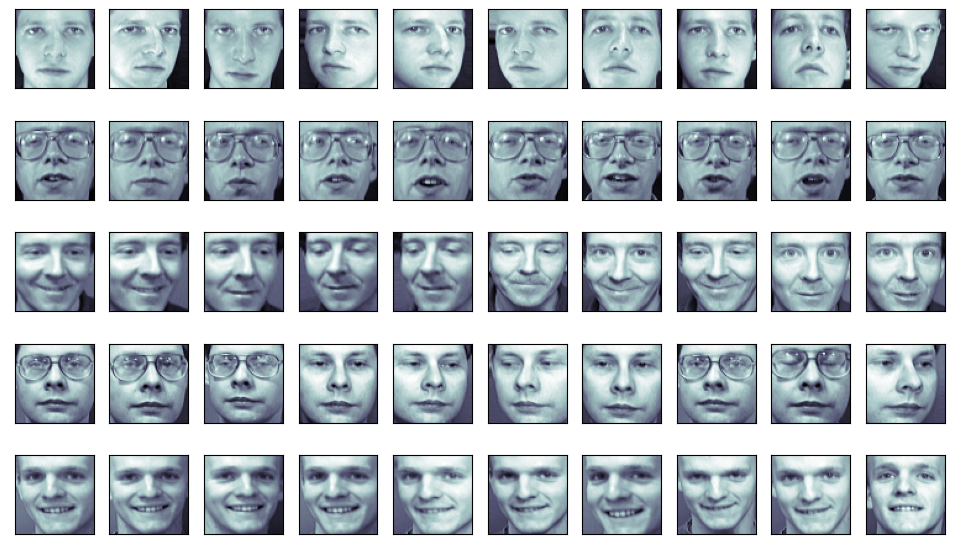

In [11]:
from matplotlib import pyplot as plt
from sklearn import datasets
faces = datasets.fetch_olivetti_faces()

print('dataset size:')
print(faces.data.shape)

print('Photo size:')
thisshape = faces.images[0].shape
print(thisshape)

persons = 5;

# visualize the 10 poses of 5 indivuduals
fig = plt.figure(figsize=(12, 7))
# plot several images
for i in range(persons*10):
    ax = fig.add_subplot(persons, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(faces.images[i], cmap=plt.cm.bone)

Each of the $400$ photos is $64 \times 64 = 4096$ elements. This means that if we represent each photo as a vector it will be a quite long vector, and of course $d > N$. 

**Let's perform dimensionality reduction using PCA and $k = 6$ components**

In [6]:
X_train = faces.data

# number of eigencomponents
k = 6

from sklearn import decomposition
pca = decomposition.PCA(n_components=k, whiten=True)
pca.fit(X_train)

PCA(n_components=6, whiten=True)

Let's see the "average face" from the input dataset 

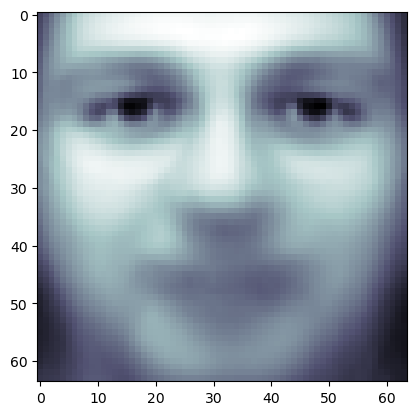

In [7]:
plt.imshow(pca.mean_.reshape(thisshape), cmap=plt.cm.bone)

Visualize the $5$ principal components, also called **eigenfaces** when it has to do with this specific application.

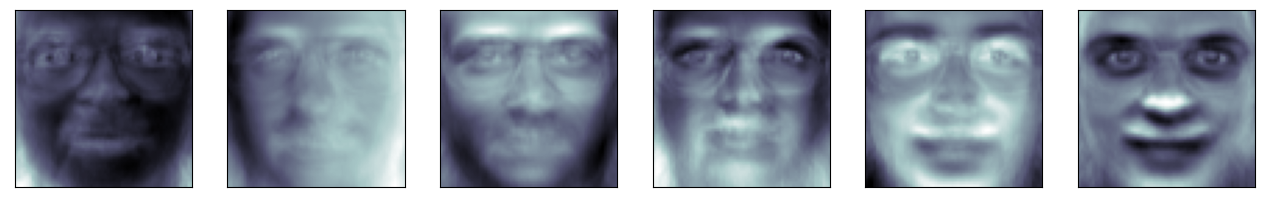

In [8]:
fig = plt.figure(figsize=(16, 6))
for i in range(k):
    ax = fig.add_subplot(1, k, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(thisshape), cmap=plt.cm.bone)

Let's project the data on the eigenbasis $u_1,...,u_k$.

In [9]:
X_train_pca = pca.transform(X_train)
print(X_train_pca.shape)

(400, 6)


Show the reconstructed faces (i.e. take the faces from the projected space and bring them back to the original space)
and compare...

Oroginal vs Reconstructed faces (i-th line is the original, i+1 is the reconstructed)


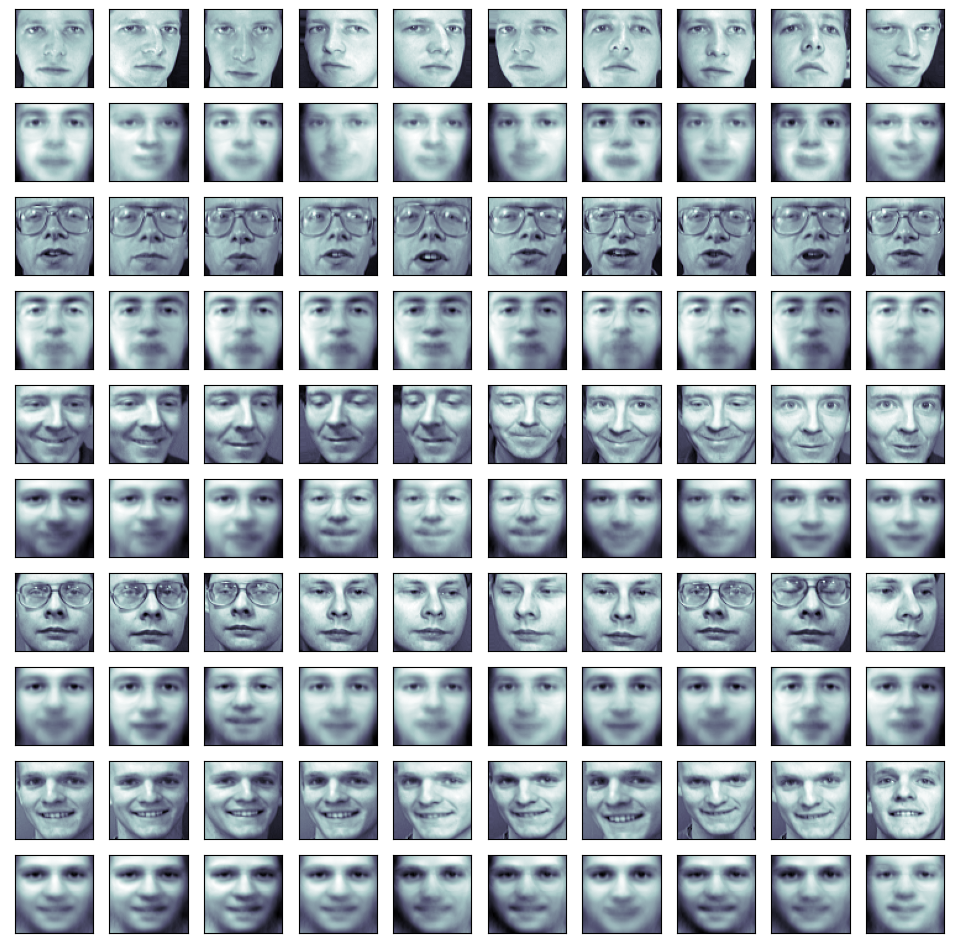

In [10]:
faces_new = pca.inverse_transform(X_train_pca)
fig = plt.figure(figsize=(12, 12))

# plot reconstructed faces
print('Oroginal vs Reconstructed faces (i-th line is the original, i+1 is the reconstructed)')
jj = 1
for i in range(persons):
    for j in range(10):
        ax = fig.add_subplot(2*persons, 10, jj, xticks=[], yticks=[])
        ax.imshow(faces.images[j+i*10], cmap=plt.cm.bone)
        jj = jj + 1
    for j in range(10):
        ax = fig.add_subplot(2*persons, 10, jj, xticks=[], yticks=[])
        ax.imshow(faces_new[j+i*10].reshape(thisshape), cmap=plt.cm.bone)
        jj = jj + 1

**Now we can try with more components... $k=50$**

In [239]:
X_train = faces.data

# number of eigencomponents
k = 50

from sklearn import decomposition
pca = decomposition.PCA(n_components=k, whiten=True)
pca.fit(X_train)

PCA(n_components=50, whiten=True)

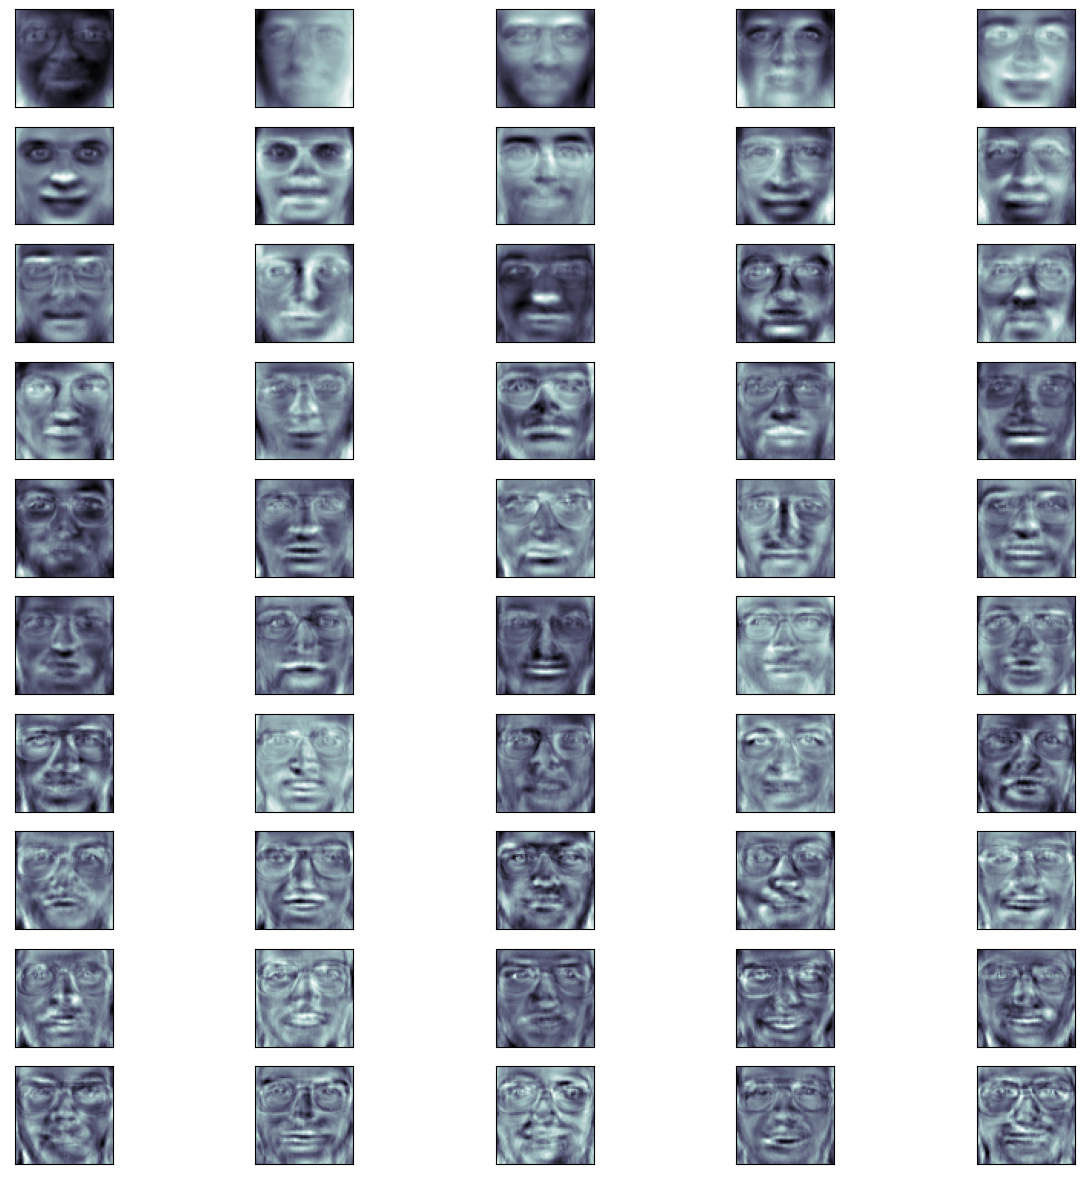

In [240]:
fig = plt.figure(figsize=(15, 15))
for i in range(k):
    ax = fig.add_subplot(int(k/persons), 5, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(thisshape), cmap=plt.cm.bone)

In [241]:
X_train_pca = pca.transform(X_train)
print(X_train_pca.shape)

(400, 50)


Oroginal vs Reconstructed faces (i-th line is the original, i+1 is the reconstructed)


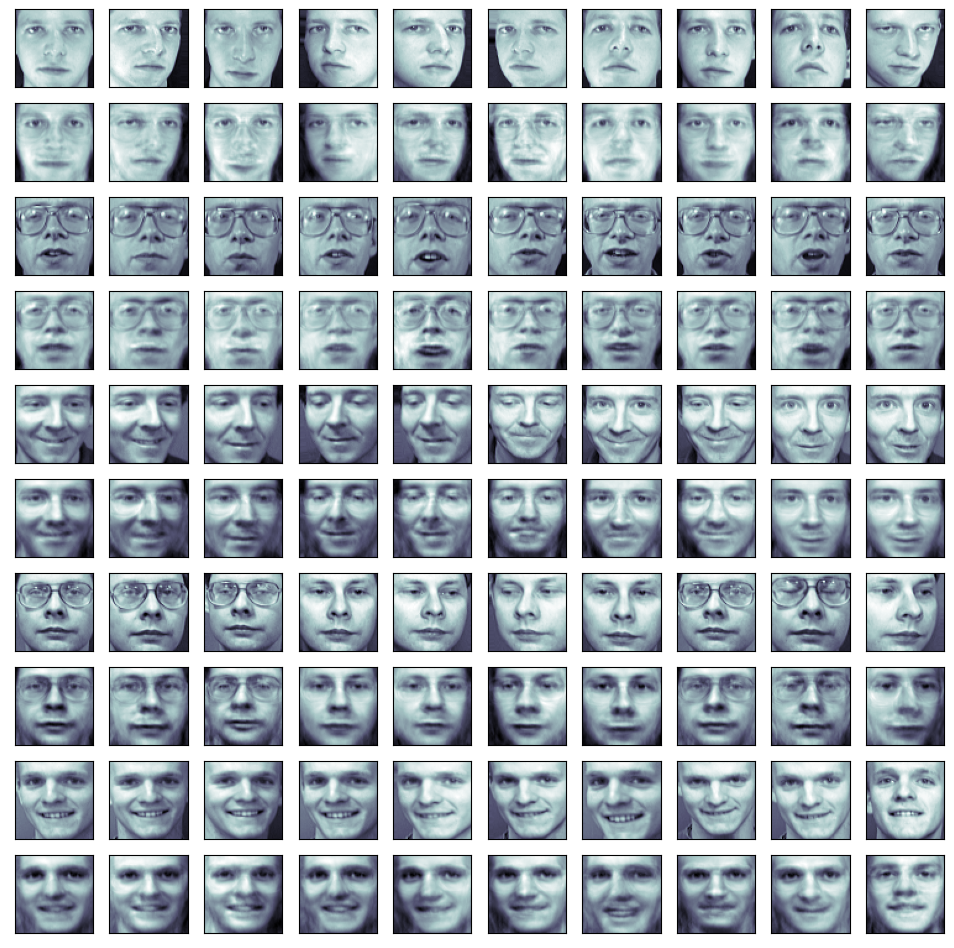

In [242]:
faces_new = pca.inverse_transform(X_train_pca)
fig = plt.figure(figsize=(12, 12))

# plot reconstructed faces
print('Oroginal vs Reconstructed faces (i-th line is the original, i+1 is the reconstructed)')
jj = 1
for i in range(persons):
    for j in range(10):
        ax = fig.add_subplot(2*persons, 10, jj, xticks=[], yticks=[])
        ax.imshow(faces.images[j+i*10], cmap=plt.cm.bone)
        jj = jj + 1
    for j in range(10):
        ax = fig.add_subplot(2*persons, 10, jj, xticks=[], yticks=[])
        ax.imshow(faces_new[j+i*10].reshape(thisshape), cmap=plt.cm.bone)
        jj = jj + 1

What is easy to conclude is that, as we increase $k$, 
- we get image projections that lose less information and thus they are better reconstructed.
- the first components (axes of the projected space) are much more different to each other compared to later components.

**Variance inclusion**

Thinking that PCA tries to set axes along directions on which the data have as high variance as possible, we can define a metric about how much of the data variance has been **included** or **explained** by the model. To perfectly encode the data, we need $N$ eigenvectors, as many as the datapoints. In that case, the projected space will have the same of course dimensionality as the original space, but its axes will be same as the original but possibly rotated, depending on the data distribution. When we consider $k < N$ then we can measure the variance inclusion as follows

$$ \text{Var_Inclusion}(k, \{\lambda_1,...,\lambda_N\}) = \frac{\sum_{i=1}^k \lambda_i}{\sum_{i=1}^N \lambda_i}
$$

In [12]:
from sklearn.preprocessing import StandardScaler

# Determine explained variance
var_incl = pca.explained_variance_ratio_

# Cumulative sum of eigenvalues 
cum_sum_eigenvalues = np.cumsum(var_incl)

# Create the visualization plot
plt.bar(range(0,len(var_incl)), var_incl, alpha=0.5, align='center', label='Explained variance for $\lambda_i$')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Component ($\lambda_i$)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

NameError: name 'np' is not defined

In [254]:
print('Variance inclusion of the 1st    eigenvector :', cum_sum_eigenvalues[0])
print('Variance inclusion of the 1...5  eigenvectors:', cum_sum_eigenvalues[5-1])
print('Variance inclusion of the 1...50 eigenvectors:', cum_sum_eigenvalues[50-1])

Variance inclusion of the 1st    eigenvector : 0.23812743
Variance inclusion of the 1...5  eigenvectors: 0.5438349
Variance inclusion of the 1...50 eigenvectors: 0.87351716
